# Interferometer simulations

Using the radiometer equation to calculate the thermal noise:

$\sigma_T = \frac{\lambda_{21}(z)^2 T_{\text{sys}}(z)}{A_{\text{eff}}\sqrt{\Delta\nu t_{\text{int}} \times n(u) \times 2 \pi u du}} \times \frac{1}{\sqrt{N_{\text{beam}}N_{\text{pol}}}}$

where $\lambda_{21}$ is the wavelength of the HI line at the redshift of observation, $T_{sys}$ is the system temperature of the survey, $A_{eff}$ is the effective area of the telescope array, $\Delta\nu$ is the channel width of the survey, $t_{int}$ is the integration time of each pointing, $n(u)$ is the baseline number density as a function of the baseline separation $u$, $N_{beam}$ is the number of beams of each station, and $N_{pol}$ is the number of polarisation of each beam.

The system temperature $T_{\text{sys}}$ is calculated using

$T_{\text{sys}} = (T_{\text{rcv}}(z) + T_{\text{spl}} + T_{\text{sky}}(z)) \times \frac{x}{e^x - 1}$

where we have defined $x = \frac{h\nu_{21}}{k_B(T_{\text{rcv}}(z) + T_{\text{spl}} + T_{\text{sky}}(z))}$, $T_{\text{sky}} = T_{\text{CMB}} + T_{\text{gal}}(z) + T_{\text{atm}}$, $T_{\text{gal}}=25 \frac{408} {\nu_{21}}^{2.75}$ is the signal contribution from within our galaxy, $T_{\text{CMB}} = 2.73 K$ is the CMB temperature contribution, $T_{\text{rcv}} = 0.1 T_{\text{gal}}(z) + 40$ is the receiver temperature, and $T_{\text{spl}}$ is the spillover temperature.



Here, we take $N_{\text{beam}} = 1$, $N_{\text{pol}}=2$, $A_{\text{eff, station}}=419000\times \frac{N_{\text{stations}}}{512} m^2$, $\Delta\nu_{21}=781250 Hz$ (all values sourced from SKA specifications, with an approximation used for the effective collecting area of stages below A4), $t_{\text{int}}=10s$ and $t_{\text{surv}}=100h$ (following the values used in Merten, Bobin, and Carucci 2024), and $n(u)$ is calculated using the antenna distribution, which is generated using the official SKA config package. We neglect $T_{\text{spl}}$ (following the 2018 red book).

In [1]:
import postEoR.observations as obs
import numpy as np
import matplotlib.pyplot as plt

AA4 = obs.SKA1LOW_AA4(0)
AAstar = obs.SKA1LOW_AAstar(0)

some_survey = obs.Interferometer(AA4, 6, 3, 100, 20, 0, freq_bin=10e6)

comp_survey = obs.Interferometer(AAstar, 6, 3, 100, 20, 0, freq_bin=10e6)


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


initialised!
initialised!


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


Below, we plot the baseline density distribution. This was calculated by calculating the number of baselines that fall in each baseline length bin, dividing by $2\pi u du$, and normalising such that the integral over the half plane of n(u) is equal to $\frac{N_a(N_a-1)}{2}$, where $N_a$ is the total number of antennas.

<>:7: DeprecationWarning: invalid escape sequence '\l'
<>:7: DeprecationWarning: invalid escape sequence '\l'
/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_7621/3658099741.py:7: DeprecationWarning: invalid escape sequence '\l'
  plt.xlabel("u, $\lambda$")


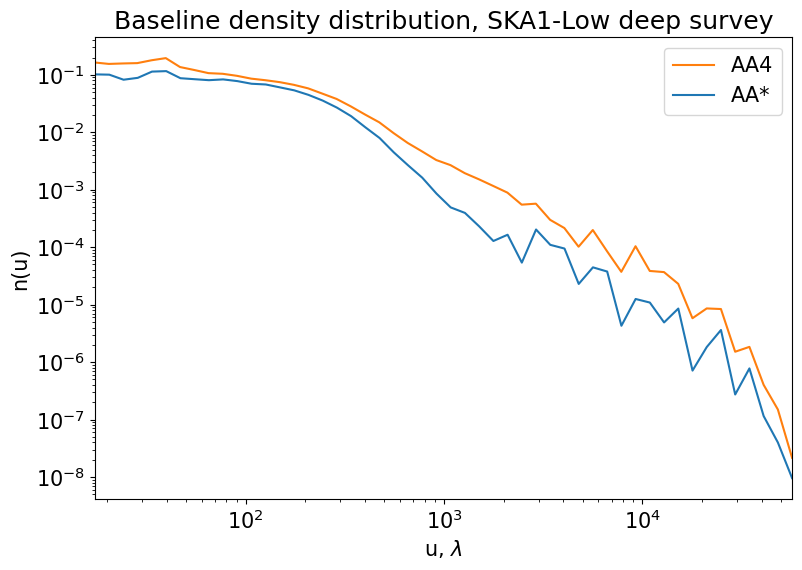

In [2]:
plt.plot(some_survey.u, some_survey.nvis, label="AA4", color="tab:orange")
plt.plot(comp_survey.u, comp_survey.nvis, label="AA*", color="tab:blue")
plt.rcParams['figure.figsize'] = [9, 6]
plt.yscale("log")
plt.xscale("log")
plt.ylabel("n(u)") 
plt.xlabel("u, $\lambda$")
plt.title("Baseline density distribution, SKA1-Low deep survey")
plt.xlim(np.min(some_survey.u), np.max(some_survey.u))
plt.legend()
plt.show()

We calculate the noise power spectrum as follows.

First, we must calculate the perpendicular wavenumbers. To do this, we use the formula

$k_{\perp}(z) = \frac{2\pi u}{r}$

where $r$ is the cosmological distance to redshift $z$ in Mpc/h, and $u$ is the baseline separation in wavelengths.

To calculate the power, we use the following formula:

$P_{\text{noise}}(k) = \frac{\sigma_{\text{T}}^2 V_{\text{pix}} 2\pi u du}{\theta_{\text{FoV}}}$

where $V_{\text{pix}}$ is the comoving volume of one element per pointing (volume per FoV and frequency channel), $du$ is the width of the baseline bins, and $\theta_{\text{FoV}}$ is the field of view of the telescope in steradians:

$V_{\text{pix}} = r^2 \frac{10^3c(1+z)^2}{H(z) \nu_{21}} \theta_{\text{FoV}}(z) \Delta\nu$ 

$\theta_{\text{FoV}} = \frac{1.220(1+z)\lambda_{21}}{0.8 D_{\text{station}}}$

where $H(z)$ is the Hubble parameter in km/s/Mpc, $\nu_{21}$ is the frequency of the HI signal at current time in Hz, $\Delta\nu$ is the frequency channel width in Hz, $\lambda_{21}$ is the wavelength of the HI signal at current time in m, and $D_{\text{station}}$ is the diameter of each station in m.

<>:10: DeprecationWarning: invalid escape sequence '\p'
<>:10: DeprecationWarning: invalid escape sequence '\p'
/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_7621/32681358.py:10: DeprecationWarning: invalid escape sequence '\p'
  plt.xlabel("k$_{\perp}$, h/Mpc")


10000000.0
10000000.0


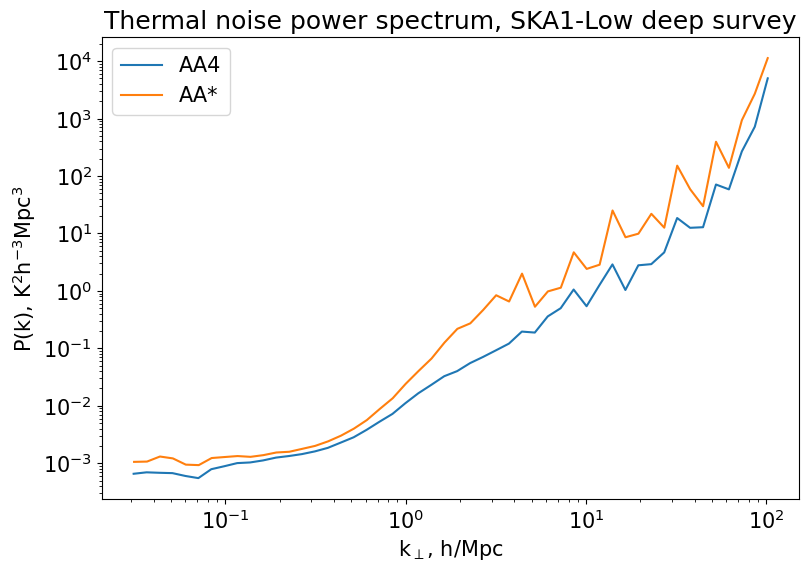

In [3]:
#some_survey.tint = 1000
ps, k = some_survey.noise_power_perp()
ps_comp, k_comp = comp_survey.noise_power_perp()

plt.plot(k, ps, label="AA4", color="tab:blue")
plt.plot(k_comp, ps_comp, label="AA*", color='tab:orange')
plt.yscale("log")
plt.xscale("log")
plt.ylabel("P(k), K$^2$h$^{-3}$Mpc$^3$")
plt.xlabel("k$_{\perp}$, h/Mpc")
plt.title("Thermal noise power spectrum, SKA1-Low deep survey")
plt.legend()
#plt.xlim(0.05, 0.3)
plt.show()

We can also plot the uv distribution, using the in-built functionality provided by SKA-ost-array-config.

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


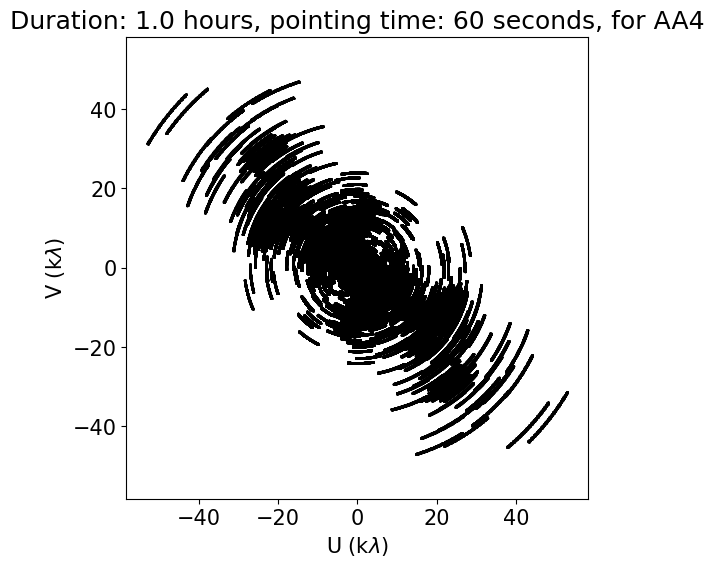

In [4]:
some_survey.plot_uv()